# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Change current working directory to project folder (1 mark)

In [ ]:
import os
#### code added below ####
os.chdir('/content/drive/My Drive/AIML/Siamese')


### Load the "images.npy" file (1 mark)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
#### code added below ####
data = np.load('images.npy',allow_pickle = True )

### Check one sample from the loaded "images.npy" file  (1 mark)

In [6]:
#### code added below ####
print(data[0])

[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)
 list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.306306

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
#### code added below ####
IMAGE_WIDTH = 224   
IMAGE_HEIGHT = 224 

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [9]:
#### code added below ####
X_train.shape

(409, 224, 224, 3)

In [10]:
#### code added below ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

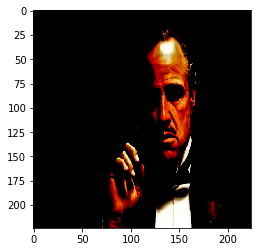

In [11]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

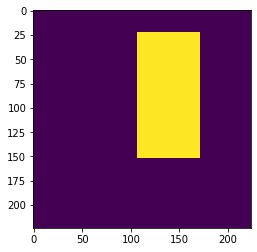

In [12]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
     #### code added below ####
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### code added below ####

    # Since mask size is 224 (same as input), we need to concatenate it back all 6 layers, i.e layers of sizes 7,14,28,56,112 & 224, bottom onwards
    block1 = model.get_layer("input_1").output         #224
    block2 = model.get_layer("conv_pw_1_relu").output  #112
    block3 = model.get_layer("conv_pw_3_relu").output  #56
    block4 = model.get_layer("conv_pw_5_relu").output  #28
    block5 = model.get_layer("conv_pw_11_relu").output #14
    block6 = model.get_layer("conv_pw_13_relu").output #7

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
 
    # Add new top layer which is an sigmoid activation layer that gives 1 or 0 depending on inside/outside the face
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
 
    return Model(inputs=model.input, outputs=x)

   

### Call the create_model function

In [14]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=True)

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    #### code added below ####
    import tensorflow
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())
    

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.python.keras.optimizers import adam

optimizer = adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])


### Define checkpoint and earlystopping

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [30]:
#### code adde below ####

model.fit(x=X_train,y=masks,
          epochs=20, batch_size=1,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True, verbose=1)


Train on 409 samples
Epoch 1/20
407/409 [============================>.] - ETA: 0s - loss: 0.8508 - dice_coefficient: 0.5913
Epoch 00001: loss improved from inf to 0.85277, saving model to model-0.85.h5
409/409 [==============================] - 29s 72ms/sample - loss: 0.8528 - dice_coefficient: 0.5906
Epoch 2/20
408/409 [============================>.] - ETA: 0s - loss: 0.6386 - dice_coefficient: 0.6689
Epoch 00002: loss improved from 0.85277 to 0.63776, saving model to model-0.64.h5
409/409 [==============================] - 19s 47ms/sample - loss: 0.6378 - dice_coefficient: 0.6692
Epoch 3/20
408/409 [============================>.] - ETA: 0s - loss: 0.5798 - dice_coefficient: 0.6937
Epoch 00003: loss improved from 0.63776 to 0.57954, saving model to model-0.58.h5
409/409 [==============================] - 19s 47ms/sample - loss: 0.5795 - dice_coefficient: 0.6938
Epoch 4/20
407/409 [============================>.] - ETA: 0s - loss: 0.5250 - dice_coefficient: 0.7176
Epoch 00004: loss 

In [0]:
#Save weights

model.save('fd.h5')
model.save_weights('fd_weights.h5')

In [0]:
# After training, loading a model of dice of 0.92
WEIGHTS_FILE = "model-0.95.h5"
THRESHOLD = 0.8
EPSILON = 0.02

model = create_model()
model.load_weights(WEIGHTS_FILE)

In [0]:
import tensorflow.keras.losses

from tensorflow.keras.models import load_model
model = load_model('fd.h5',custom_objects={'loss': loss})

### Get the predicted mask for a sample image   (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Sample Image: 10


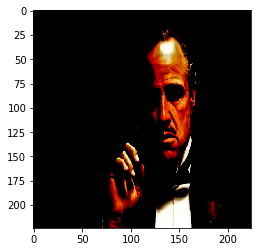


 Given Mask: 10


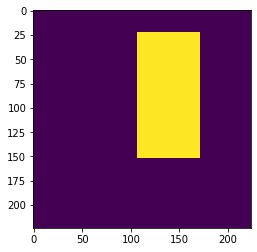


 Predicted Mask: 10


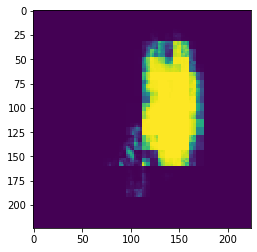

In [36]:
n = 10
sample_image = X_train[n]

#### Code below ####
print("\n Sample Image: "+ str(n)) # Sample image
pyplot.imshow(sample_image) 
pyplot.show()

print("\n Given Mask: "+ str(n)) # Given Mask
pyplot.imshow(masks[n])
pyplot.show()

print("\n Predicted Mask: "+ str(n)) # Predicted Mask
a=model.predict(sample_image.reshape(1,224,224,3))
pyplot.imshow(a.reshape(224,224)) 
pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample Image: 11


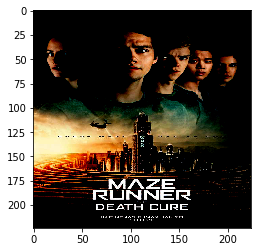


 Given Mask: 11


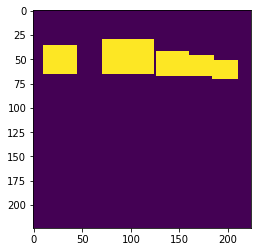


 Predicted Mask: 11


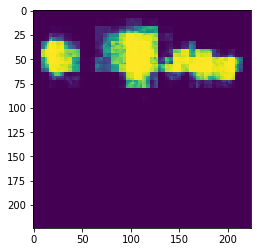

In [37]:
n = 11
sample_image = X_train[n]

#### Code below ####
print("Sample Image: "+ str(n)) # Sample image
pyplot.imshow(sample_image) 
pyplot.show()

print("\n Given Mask: "+ str(n)) # Given Mask
pyplot.imshow(masks[n])
pyplot.show()

print("\n Predicted Mask: "+ str(n)) # Predicted Mask
a=model.predict(sample_image.reshape(1,224,224,3))
pyplot.imshow(a.reshape(224,224)) 
pyplot.show()

### Impose the mask on the image (3 marks)

In [0]:
#### Add your code here ####